1) Extract reviews of any product from ecommerce website like amazon

2) Perform emotion mining

In [10]:
!pip install selenium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [33]:
import tweepy
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
wordnet=WordNetLemmatizer()
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import requests
from bs4 import BeautifulSoup as bs
from selenium import webdriver

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [15]:
samsung_reviews=[]

In [16]:
for i in range (1,31):
  op=[]
  url ="https://www.amazon.in/product-reviews/B08444S68Q/ref=acr_dp_hist_5?ie=UTF8&filterByStar=five_star&reviewerType=all_reviews"+str(i)
  response = requests.get(url)
  soup = bs(response.content,'html.parser')
  reviews = soup.findAll('span',attrs = {'class',"a-size-base review-text review-text-content"})
  for i in range(len(reviews)):
    op.append(reviews[i].text)
  samsung_reviews = samsung_reviews+op

In [18]:
samsung_reviews

["\nS20 Ultra is 6.9 inches of pure smoothness and brilliance. I am coming from One Plus 7pro and was looking to upgrade. 8 Pro sounds like a logical choice, but after having used A70 for sometime, wanted to use the great displays Samsung is famous for.Most people buy phones for various reasons. For me there are following things I look for:1. Display quality2. Ease of use3. Safety and security4. Clean interface with possible customisations5. Of course, the basic ability to make and receive audio/video calls with stability.6. Battery lifeS20 Ultra fulfils most above criterion, except maybe the fingerprint reader. I have used OP 7Pro, Oppo, Realme and Mi. Believe me, fingerprint reader implementation by Samsung is the worst.  It will leave you fuming when you need to unlock phone in a hurry. Face recognition is fast, but with 'mask on' situation, face reader is of no use.That for me is the single bad point for all Samsung phones.Before picking up S20 Ultra, I tried Note 20 Ultra and abso

In [19]:
reviews = ' '.join(samsung_reviews)

**DATA CLEANING**

In [21]:
reviews = re.sub('[^A-Za-z' ']+',' ',reviews).lower()
reviews = re.sub('[0-9' ']+',' ',reviews).lower()
reviews = re.sub(r'^https?:\/\/.*[\r\n]*',' ',reviews).lower()

**TOKENIZE**

In [30]:
reviews_token = word_tokenize(reviews)


In [34]:
reviews_without_sw = [word for word in reviews_token if not word in stopwords.words()]
reviews_without_sw

['ultra',
 'inches',
 'pure',
 'smoothness',
 'brilliance',
 'coming',
 'pro',
 'upgrade',
 'pro',
 'sounds',
 'logical',
 'choice',
 'wanted',
 'great',
 'displays',
 'samsung',
 'famous',
 'buy',
 'phones',
 'reasons',
 'things',
 'display',
 'quality',
 'ease',
 'safety',
 'security',
 'clean',
 'interface',
 'possible',
 'customisations',
 'course',
 'basic',
 'ability',
 'make',
 'receive',
 'audio',
 'video',
 'calls',
 'stability',
 'battery',
 'lifes',
 'ultra',
 'fulfils',
 'criterion',
 'fingerprint',
 'reader',
 'pro',
 'oppo',
 'realme',
 'believe',
 'fingerprint',
 'reader',
 'implementation',
 'samsung',
 'worst',
 'leave',
 'fuming',
 'unlock',
 'phone',
 'hurry',
 'recognition',
 'fast',
 'mask',
 'situation',
 'reader',
 'single',
 'point',
 'samsung',
 'phones',
 'picking',
 'ultra',
 'note',
 'ultra',
 'absolutely',
 'phone',
 'heating',
 'seconds',
 'wise',
 'note',
 'ultra',
 'trumps',
 'ultra',
 'remove',
 'pen',
 'note',
 'ultra',
 'ultra',
 'rectangular',
 'shap

In [35]:
reviews = ' '.join(reviews_without_sw)

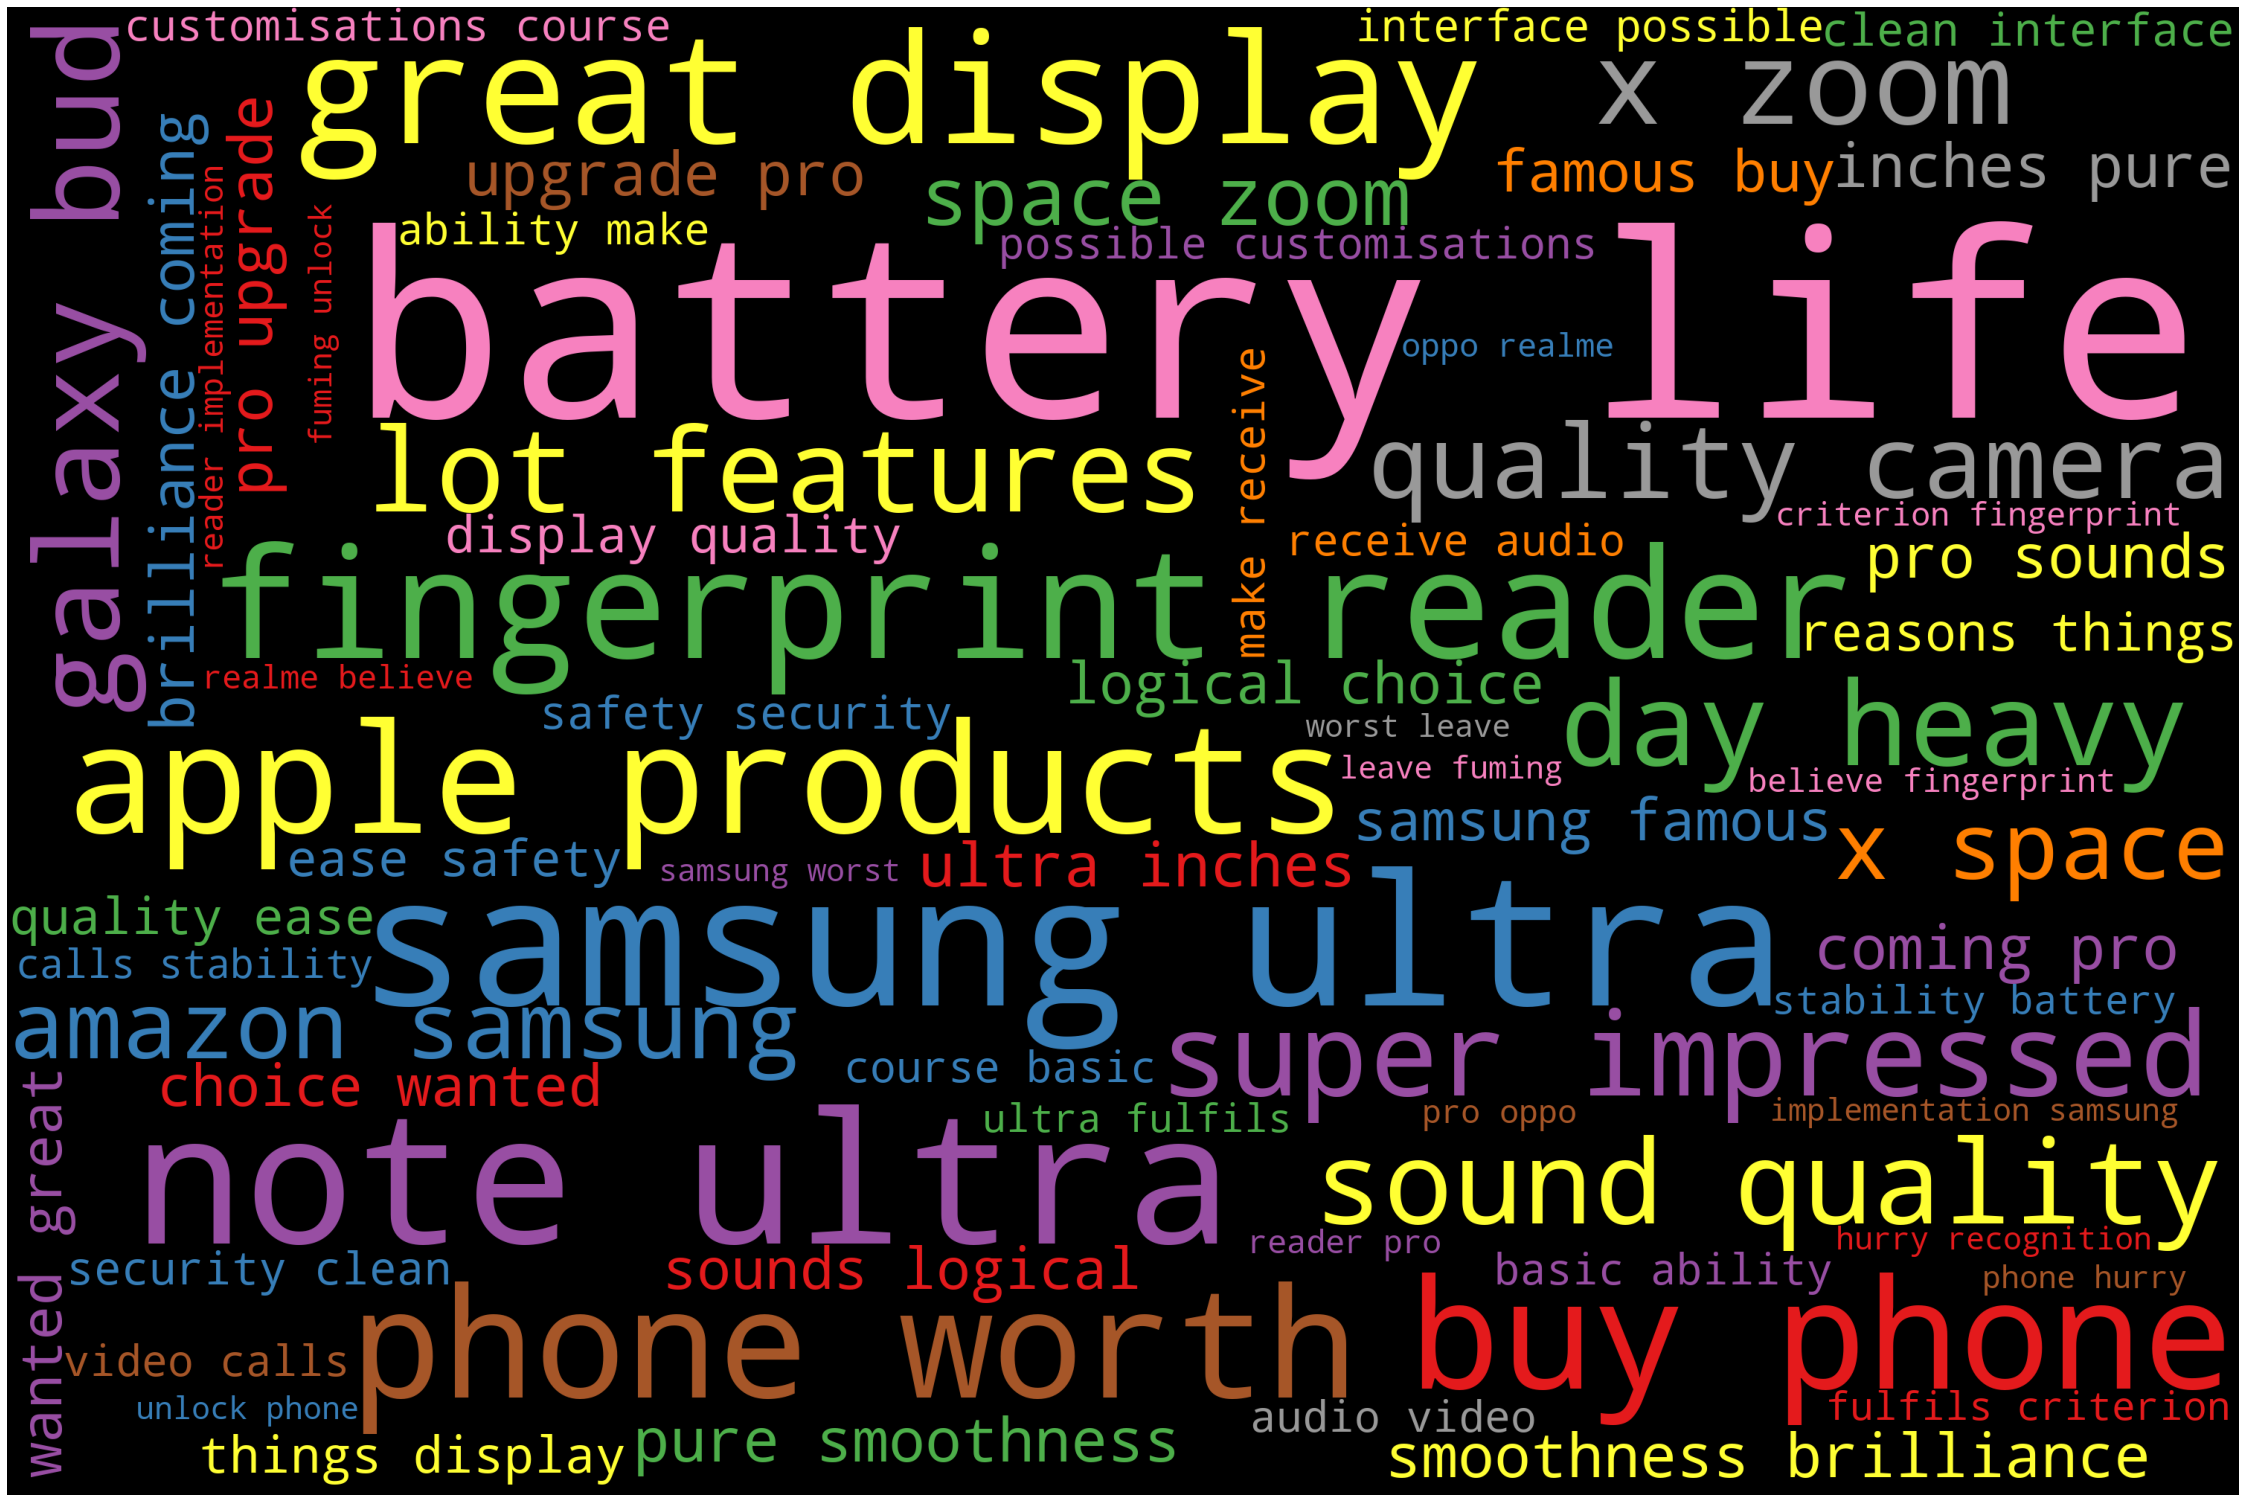

In [37]:
def plot_cloud(wordcloud):
  plt.figure(figsize=(40,30))
  plt.imshow(wordcloud)
  plt.axis('off')

from wordcloud import WordCloud,STOPWORDS
STOPWORDS.add('refresh')
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=70,colormap='Set1',stopwords=STOPWORDS).generate(reviews)
plot_cloud(wordcloud)

In [39]:
from google.colab import files
uploaded = files.upload()

Saving negative-words.txt to negative-words.txt


In [43]:
with open(r"negative-words.txt",encoding="ISO-8859-1") as f:
    negative=f.read().split('\n')


In [45]:
negative = negative[35:]

In [46]:
reviews_neg=' '.join([word for word in reviews_without_sw if word in negative])

**WORD CLOUD FOR NEGATIVE WORDS**

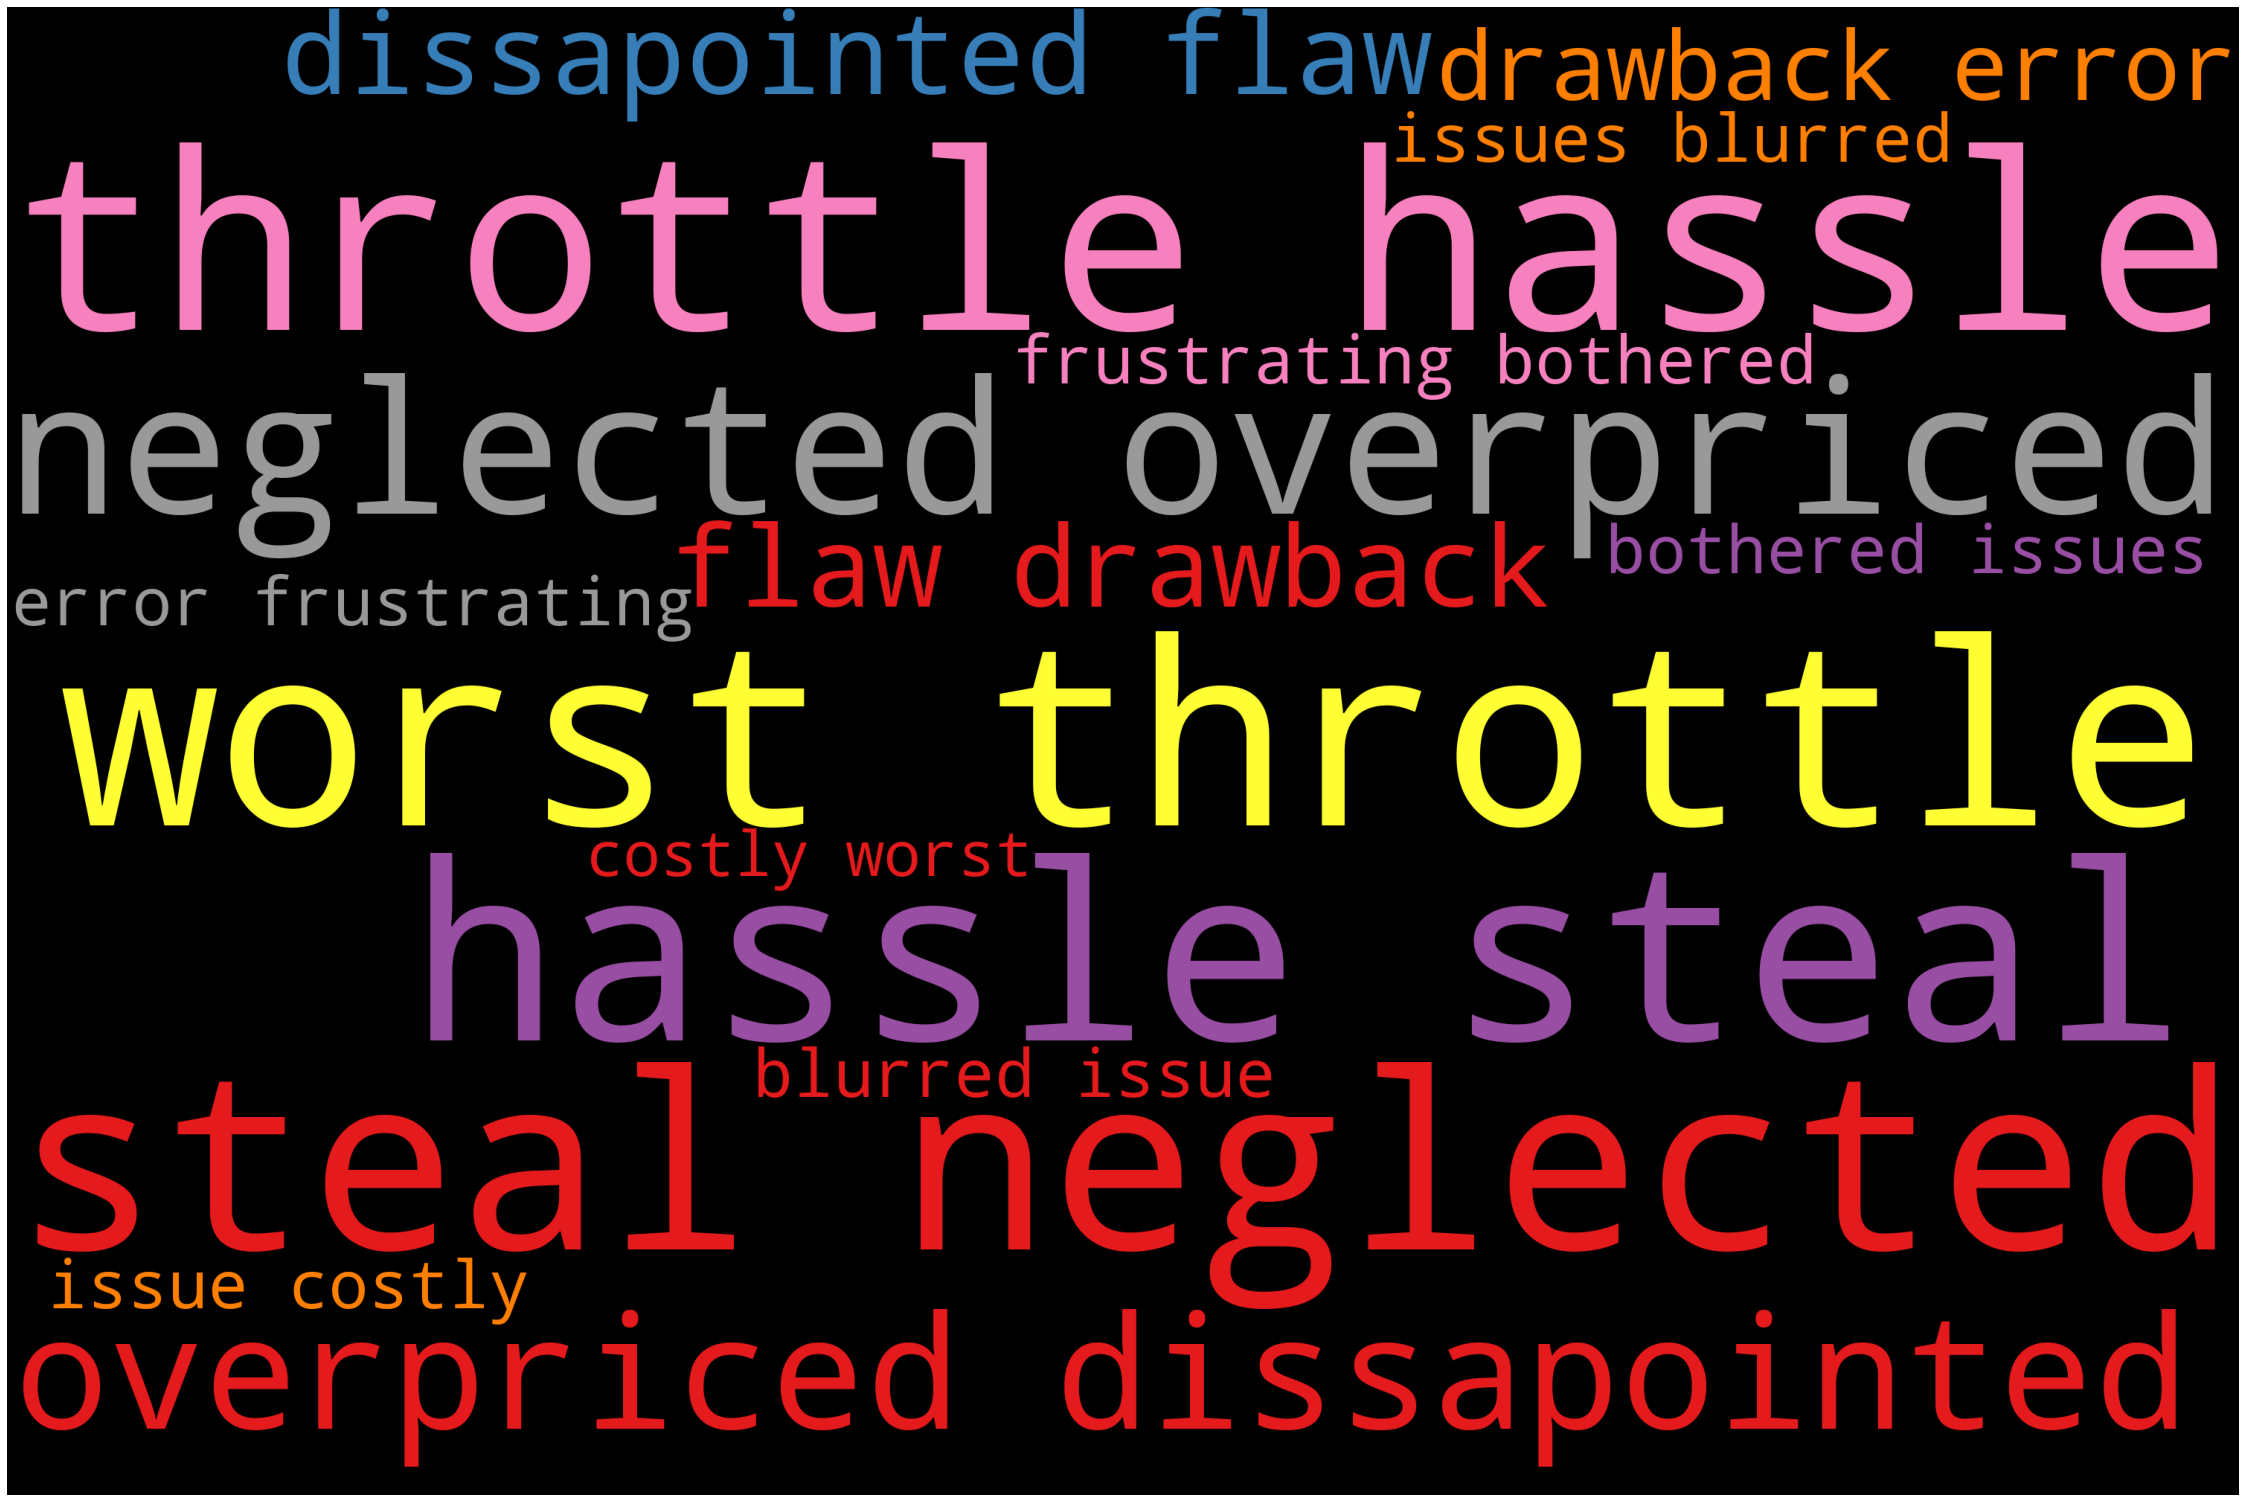

In [47]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')
    

from wordcloud import WordCloud, STOPWORDS
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=70,
                   colormap='Set1',stopwords=STOPWORDS).generate(reviews_neg)
plot_cloud(wordcloud)

In [48]:
from google.colab import files
uploaded = files.upload()

Saving positive-words.txt to positive-words.txt


In [50]:
with open("positive-words.txt",encoding="ISO-8859-1") as f:
    positive=f.read().split("\n")

In [51]:
reviews_pos=' '.join([word for word in reviews if word in positive])
positive = positive[35:]

In [52]:
reviews_pos=' '.join([word for word in reviews_without_sw if word in positive])


**WORD CLOUD FOR POSITIVE WORDS**

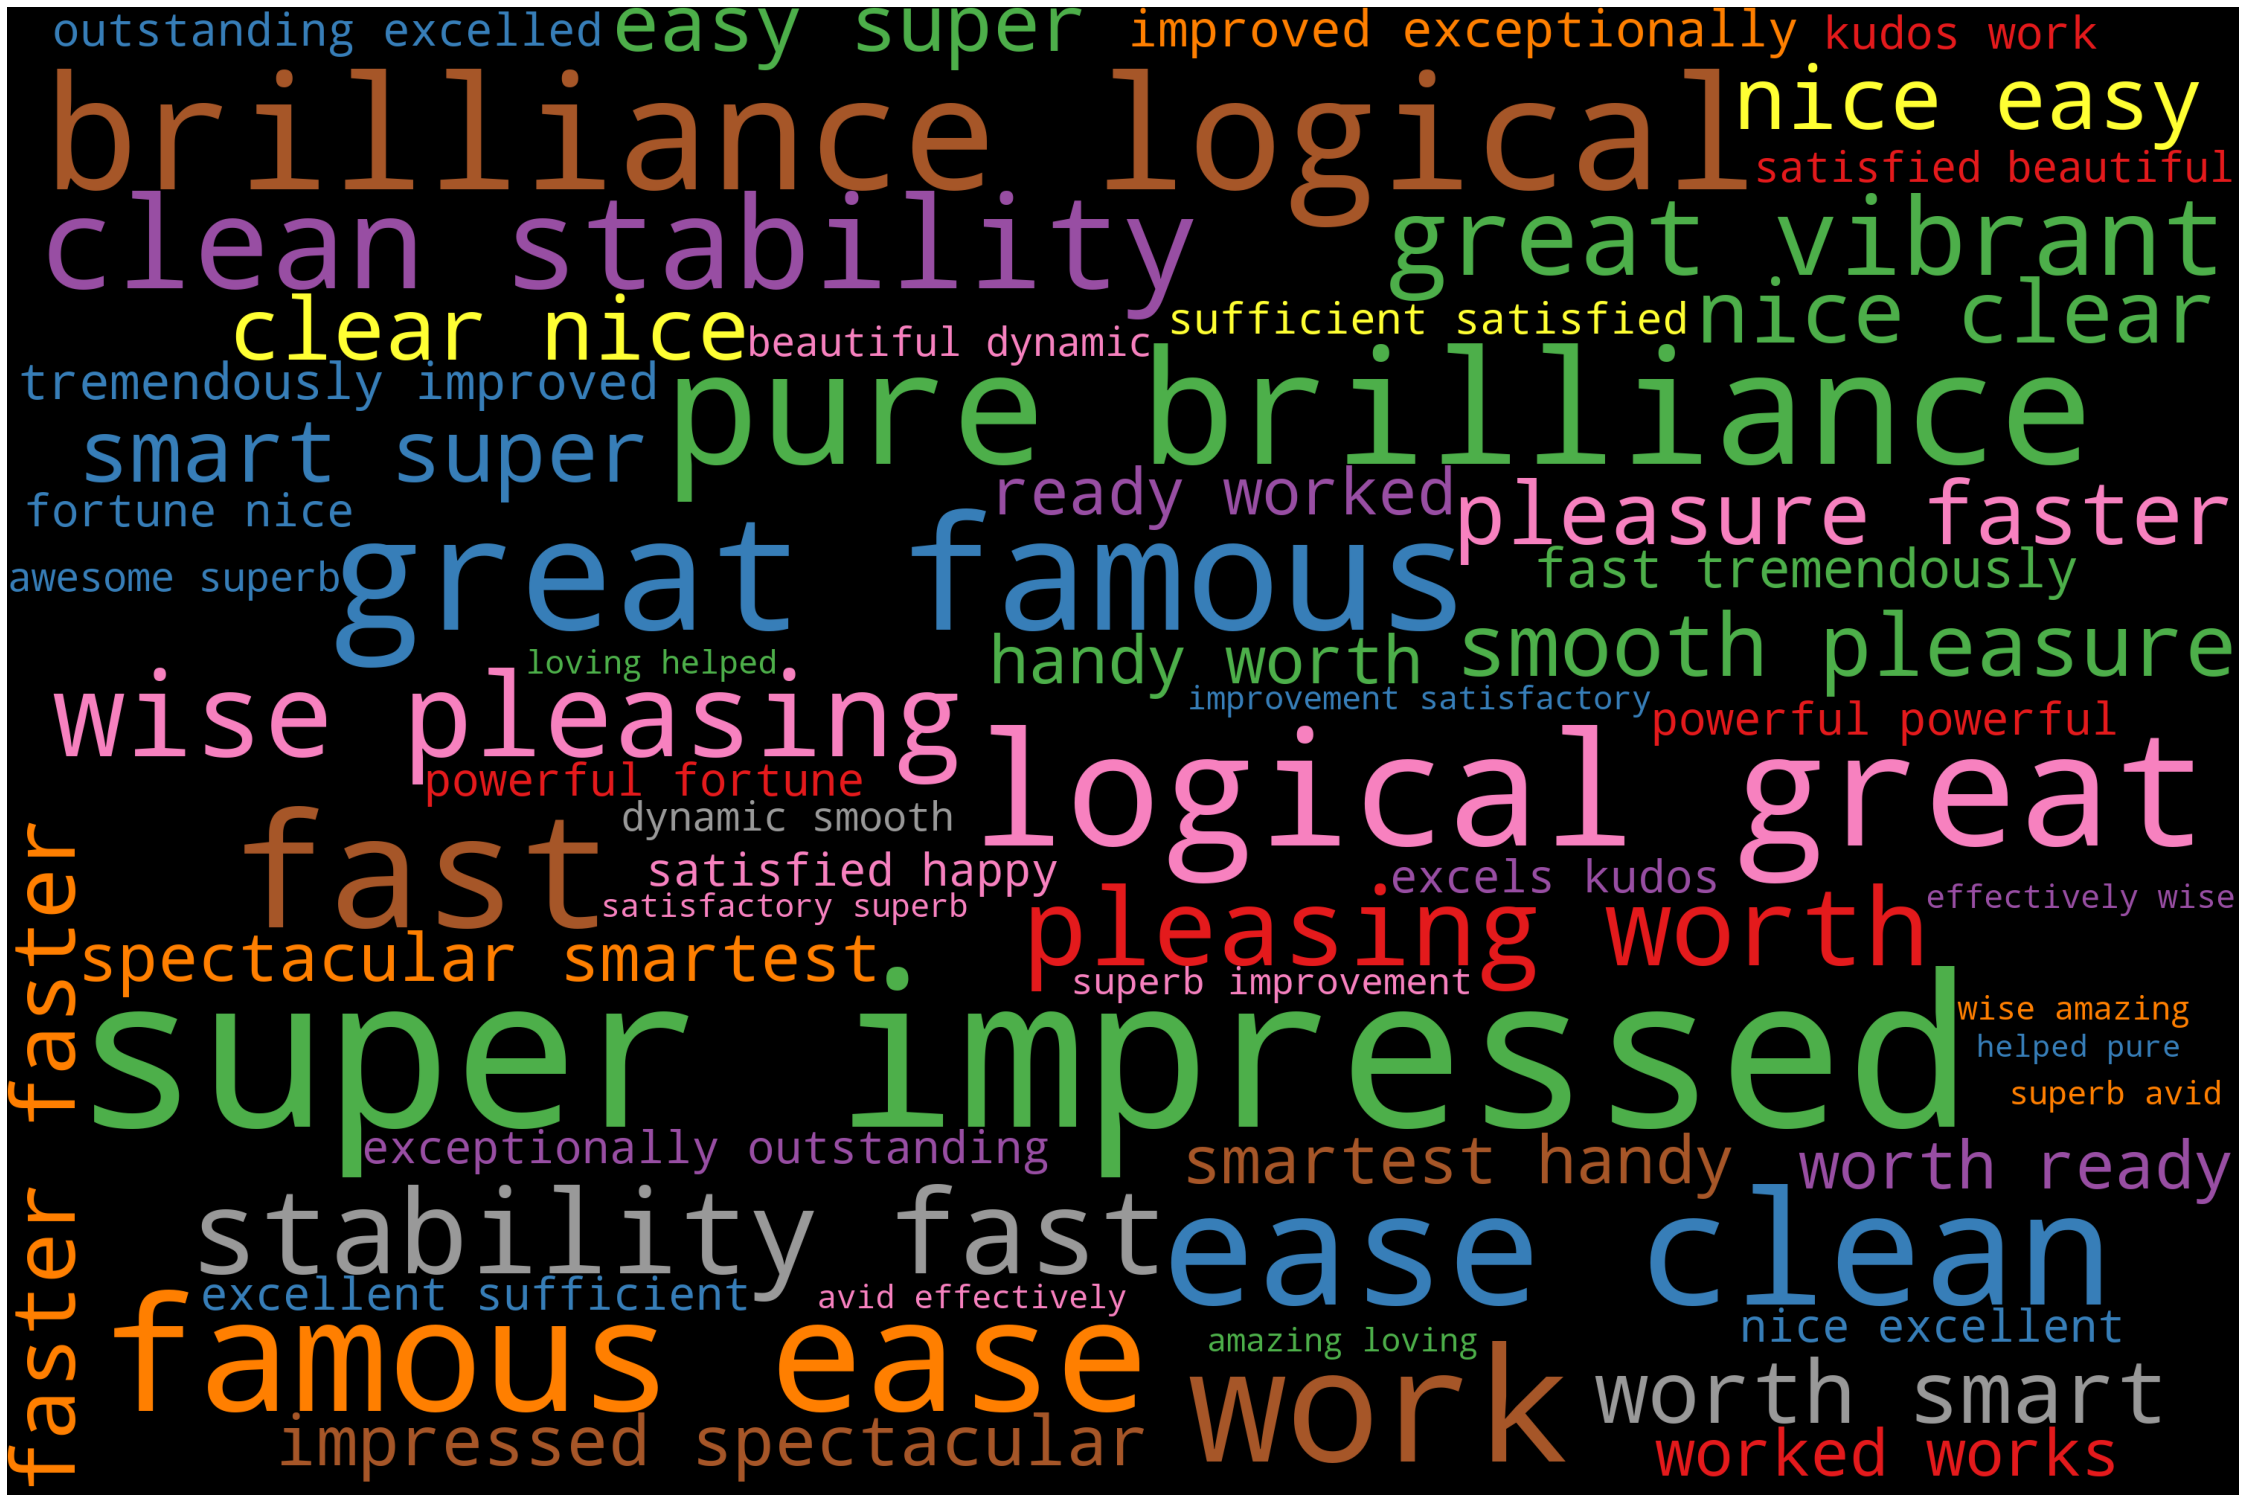

In [53]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')
    

from wordcloud import WordCloud, STOPWORDS
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=70,
                   colormap='Set1',stopwords=STOPWORDS).generate(reviews_pos)
plot_cloud(wordcloud)